In [2]:
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd
import requests

In [ ]:
url = "https://www.99acres.com/property-rates-and-price-trends-in-mumbai"
headers = {"User-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"}
page = requests.get(url,headers = headers)

text = page.text
page.status_code

In [ ]:
soup = BeautifulSoup(text,"html.parser")

In [ ]:
# Table
Table = soup.find("table", attrs={"class":"prTble"}).tbody  

In [ ]:
rows = Table.find_all("tr")

In [ ]:
# Site shows 906 localities
# len(rows)

In [ ]:
rows[0].find_all("td")
c[0]

In [ ]:
# Prototype
for r in rows[:7]:
    c = r.find_all("td")
    print(len(c))
    if len(c) == 0:
        print(r.text)
        print("\n")
    else:
        for t in c:
            print(t)
            # print(t.class)
        print("\n")

In [ ]:
data = {"sub_city":[],"place":[],"price_range":[],"q/q":[],"trend":[],"1BHK":[],"2BHK":[],"3BHK":[]}

In [ ]:

for r in rows:
    row = r.find_all("td")
    if len(row) == 0:
        data["sub_city"].append(r.text)
        temp = r.text
    else:
        data["sub_city"].append(temp)
        data["place"].append(row[0].text)
        data["price_range"].append(row[1].text)
        data["q/q"].append(row[2].text)
        data["trend"].append(row[3].text)
        data["1BHK"].append(row[4].text)
        data["2BHK"].append(row[5].text)
        data["3BHK"].append(row[6].text)
        

In [ ]:
data["sub_city"] = data["sub_city"][:-9]

In [ ]:
for key in data:
    print(len(data[key]))

In [ ]:
Data = pd.DataFrame(data)

In [ ]:
Data.head()

In [ ]:
# Data.to_csv("mumbai_housing_price.csv")

In [3]:
price_df = pd.read_csv("webscraped_mumbai_housing_price.csv")

In [4]:
price_df.shape

(906, 9)

In [5]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   906 non-null    int64 
 1   sub_city     906 non-null    object
 2   place        906 non-null    object
 3   price_range  906 non-null    object
 4   q/q          906 non-null    object
 5   trend        906 non-null    object
 6   1BHK         906 non-null    object
 7   2BHK         906 non-null    object
 8   3BHK         906 non-null    object
dtypes: int64(1), object(8)
memory usage: 63.8+ KB


In [6]:
price_df.head()

,Unnamed: 0,sub_city,place,price_range,q/q,trend,1BHK,2BHK,3BHK
0,0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",-1.03% ...,\nSee Trends\n,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310"
1,1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",-,\nNot Available\n,-,"Rs. 18,553 - 20,973",-
2,2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",-2.24% ...,\nSee Trends\n,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345"
3,3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",-0.48% ...,\nSee Trends\n,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-
4,4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",-,\nNot Available\n,-,-,-


In [7]:
price_df.drop(price_df.columns[0], axis=1, inplace=True)

In [9]:
price_df

,sub_city,place,price_range,q/q,trend,1BHK,2BHK,3BHK
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",-1.03% ...,\nSee Trends\n,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310"
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",-,\nNot Available\n,-,"Rs. 18,553 - 20,973",-
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",-2.24% ...,\nSee Trends\n,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345"
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",-0.48% ...,\nSee Trends\n,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",-,\nNot Available\n,-,-,-
...,...,...,...,...,...,...,...,...
901,Mumbai Harbour,Tolaram Colony,-,-,\nNot Available\n,"Rs. 23,162 - 28,258","Rs. 32,512 - 36,338",-
902,Mumbai Harbour,Union Park,"Rs. 19,210 - 23,035/sq. ft.",-6.01% ...,\nSee Trends\n,"Rs. 25,500 - 29,580","Rs. 39,525 - 43,478","Rs. 56,695 - 65,322"
903,Mumbai Harbour,Wadala,"Rs. 17,085 - 19,848/sq. ft.",-3.52% ...,\nSee Trends\n,"Rs. 33,600 - 36,610","Rs. 42,211 - 47,893","Rs. 61,404 - 71,638"
904,Mumbai Harbour,Wadala East,"Rs. 17,510 - 19,805/sq. ft.",-4.55% ...,\nSee Trends\n,"Rs. 28,221 - 30,461","Rs. 40,545 - 45,135","Rs. 56,962 - 63,663"


In [10]:
def df_value_counts(data):
    for col in data.columns:
        print("Value Counts of " + col)
        print("----------------------------")
        print(data[col].value_counts(dropna = False))
        print("\n")

In [11]:
df_value_counts(price_df)

Value Counts of sub_city
----------------------------
Mumbai Navi                288
Mumbai Andheri-Dahisar     167
Mumbai Beyond Thane        105
Central Mumbai suburbs      85
Mumbai Thane                79
Mira Road And Beyond        70
Mumbai South                59
Mumbai South West           30
Mumbai Harbour              23
Name: sub_city, dtype: int64


Value Counts of place
----------------------------
Hanuman Nagar         3
Tilak Nagar           3
Siddharth Nagar       3
Subhash Nagar         2
Sunder Nagar          2
                     ..
Sector 42 Seawoods    1
Sector-8 Charkop      1
Taloja                1
Hiranandani Estate    1
Shaninagar            1
Name: place, Length: 887, dtype: int64


Value Counts of price_range
----------------------------
-                              117
Rs. 3,018 - 3,485/sq. ft.        3
Rs. 3,825 - 4,250/sq. ft.        2
Rs. 7,735 - 8,628/sq. ft.        2
Rs. 13,558 - 14,875/sq. ft.      2
                              ... 
Rs. 9,350 - 1

In [12]:
price_df.sub_city.unique()

array(['Mumbai Thane ', 'Mumbai Beyond Thane ', 'Mira Road And Beyond ',
       'Mumbai Andheri-Dahisar ', 'Mumbai South West ',
       'Central Mumbai suburbs ', 'Mumbai Navi ', 'Mumbai South ',
       'Mumbai Harbour '], dtype=object)

In [13]:
def clean_extra_spaces(data,col,column = True):
    if column:
        return data[col].apply(lambda x: x.strip(),)

    else:
        for c in data.columns:
            data[c].apply(lambda x: x.strip())
        return data
    

In [14]:
price_df.sub_city = clean_extra_spaces(price_df,"sub_city")

In [15]:
price_df.sub_city.unique()

array(['Mumbai Thane', 'Mumbai Beyond Thane', 'Mira Road And Beyond',
       'Mumbai Andheri-Dahisar', 'Mumbai South West',
       'Central Mumbai suburbs', 'Mumbai Navi', 'Mumbai South',
       'Mumbai Harbour'], dtype=object)

place

In [16]:
price_df.place.unique()[:20]

array(['Anand Nagar', 'Ashok Nagar', 'Balkum', 'Balkum Pada',
       'Bhaskar Colony', 'Bhayandarpada', 'Brahmand', 'Budhaji Nagar',
       'Charai', 'Chirak Nagar', 'Damoji Patil Wadi', 'Devdaya Nagar',
       'Dhobi Ali', 'Dhokali', 'Diva Gaon', 'Dokali Pada', 'Dongripada',
       'Eden Wood', 'Ganeshwadi', 'Gawand Baug'], dtype=object)

In [17]:
price_df.place = clean_extra_spaces(price_df,"place")

In [18]:
price_df.place

0         Anand Nagar
1         Ashok Nagar
2              Balkum
3         Balkum Pada
4      Bhaskar Colony
            ...      
901    Tolaram Colony
902        Union Park
903            Wadala
904       Wadala East
905       Wadala West
Name: place, Length: 906, dtype: object

Price range

In [19]:
price_df.price_range

0        Rs. 7,735 - 8,628/sq. ft.
1       Rs. 8,840 - 10,242/sq. ft.
2        Rs. 8,755 - 9,988/sq. ft.
3        Rs. 8,542 - 9,095/sq. ft.
4      Rs. 13,940 - 15,555/sq. ft.
                  ...             
901                              -
902    Rs. 19,210 - 23,035/sq. ft.
903    Rs. 17,085 - 19,848/sq. ft.
904    Rs. 17,510 - 19,805/sq. ft.
905    Rs. 19,168 - 22,780/sq. ft.
Name: price_range, Length: 906, dtype: object

In [20]:
price_df = price_df[~(price_df.price_range == "-")]

In [21]:
price_df["price_lower_limit"] = price_df["price_range"].apply(lambda x: x.split("-")[0].split(". ")[-1].replace(",","").strip())
price_df["price_lower_limit"].unique()

array(['7735', '8840', '8755', '8542', '13940', '7012', '8415', '7268',
       '10158', '10455', '13260', '11900', '9605', '8968', '2422', '8798',
       '10582', '7905', '9478', '7522', '8202', '10710', '14492', '10200',
       '12070', '9095', '3230', '7608', '9945', '7352', '3612', '8372',
       '10880', '5015', '10625', '9392', '8288', '9052', '9562', '11220',
       '10922', '7140', '9902', '7182', '12920', '6842', '11560', '7990',
       '9010', '10540', '10838', '7395', '9690', '11092', '11815', '9435',
       '4718', '9222', '4972', '3358', '3400', '3315', '3740', '3868',
       '6885', '3018', '2848', '3102', '6248', '7480', '2125', '3698',
       '4930', '6035', '3145', '2678', '4038', '5355', '5228', '6205',
       '5652', '5992', '5398', '4080', '2975', '2890', '3188', '5610',
       '4122', '2762', '5525', '3060', '2720', '6502', '3272', '3442',
       '5270', '3528', '2805', '4420', '3570', '4845', '4802', '5568',
       '6332', '3952', '5908', '5950', '3910', '4335', '3

In [22]:
price_df["price_upper_limit"] = price_df["price_range"].apply(lambda x: x.split("-")[1].split("/")[0].replace(",","").strip())
price_df["price_upper_limit"].unique()

array(['8628', '10242', '9988', '9095', '15555', '7905', '9308', '8202',
       '12155', '11688', '13812', '14280', '3272', '9818', '11560',
       '8585', '10115', '8670', '10328', '12750', '16575', '12112',
       '12410', '3740', '8755', '11348', '8330', '4165', '9520', '12665',
       '5822', '11645', '10285', '10498', '11220', '10200', '8500',
       '7480', '14535', '7862', '13728', '8798', '11772', '12198', '8712',
       '14450', '10668', '11900', '13302', '15598', '12495', '10965',
       '11390', '10625', '11858', '9222', '5738', '11475', '13345',
       '5610', '3910', '3995', '4080', '4845', '4590', '7522', '3485',
       '3060', '3868', '4718', '3400', '6842', '8288', '2550', '4675',
       '5525', '6800', '3145', '4632', '4972', '6290', '5908', '6205',
       '7098', '6332', '6418', '5780', '6588', '3612', '3952', '5398',
       '3570', '5100', '3698', '3315', '3528', '7650', '4038', '4250',
       '6460', '6375', '2975', '6502', '7608', '3825', '5482', '5015',
       '51

In [23]:
price_df.head(20)

,sub_city,place,price_range,q/q,trend,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",-1.03% ...,\nSee Trends\n,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",-,\nNot Available\n,-,"Rs. 18,553 - 20,973",-,8840,10242
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",-2.24% ...,\nSee Trends\n,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",-0.48% ...,\nSee Trends\n,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",-,\nNot Available\n,-,-,-,13940,15555
5,Mumbai Thane,Bhayandarpada,"Rs. 7,012 - 7,905/sq. ft.",0% ...,\nSee Trends\n,-,"Rs. 13,600 - 15,300",-,7012,7905
6,Mumbai Thane,Brahmand,"Rs. 8,415 - 9,308/sq. ft.",0% ...,\nSee Trends\n,"Rs. 12,243 - 12,714","Rs. 16,830 - 19,890",-,8415,9308
7,Mumbai Thane,Budhaji Nagar,"Rs. 7,268 - 8,202/sq. ft.",-3.63% ...,\nSee Trends\n,-,-,-,7268,8202
8,Mumbai Thane,Charai,"Rs. 10,158 - 12,155/sq. ft.",4.26% ...,\nSee Trends\n,"Rs. 13,260 - 14,586",-,-,10158,12155
9,Mumbai Thane,Chirak Nagar,"Rs. 10,455 - 11,688/sq. ft.",-0.38% ...,\nSee Trends\n,"Rs. 17,629 - 20,222","Rs. 20,196 - 22,889",-,10455,11688


In [24]:
 price_df.price_lower_limit =  price_df.price_lower_limit.apply(lambda x: int(x))

In [25]:
 price_df.price_upper_limit =  price_df.price_upper_limit.apply(lambda x: int(x))

In [26]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 0 to 905
Data columns (total 10 columns):
sub_city             789 non-null object
place                789 non-null object
price_range          789 non-null object
q/q                  789 non-null object
trend                789 non-null object
1BHK                 789 non-null object
2BHK                 789 non-null object
3BHK                 789 non-null object
price_lower_limit    789 non-null int64
price_upper_limit    789 non-null int64
dtypes: int64(2), object(8)
memory usage: 67.8+ KB


q/q

In [27]:
price_df["q/q"]

0      -1.03%                                        ...
1              -                                        
2      -2.24%                                        ...
3      -0.48%                                        ...
4              -                                        
                             ...                        
900    -1.17%                                        ...
902    -6.01%                                        ...
903    -3.52%                                        ...
904    -4.55%                                        ...
905    -9.09%                                        ...
Name: q/q, Length: 789, dtype: object

In [28]:
price_df["q/q"] = price_df["q/q"].apply(lambda x: x.replace("-",str(0)).split("%")[0].strip())

In [29]:
price_df["q/q"] = price_df["q/q"].apply(lambda x : float(x))

In [30]:
price_df

,sub_city,place,price_range,q/q,trend,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,\nSee Trends\n,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,\nNot Available\n,-,"Rs. 18,553 - 20,973",-,8840,10242
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,\nSee Trends\n,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,\nSee Trends\n,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,\nNot Available\n,-,-,-,13940,15555
...,...,...,...,...,...,...,...,...,...,...
900,Mumbai Harbour,Tilak Nagar,"Rs. 13,558 - 15,385/sq. ft.",1.17,\nSee Trends\n,"Rs. 22,100 - 24,752","Rs. 32,201 - 36,035","Rs. 41,861 - 47,369",13558,15385
902,Mumbai Harbour,Union Park,"Rs. 19,210 - 23,035/sq. ft.",6.01,\nSee Trends\n,"Rs. 25,500 - 29,580","Rs. 39,525 - 43,478","Rs. 56,695 - 65,322",19210,23035
903,Mumbai Harbour,Wadala,"Rs. 17,085 - 19,848/sq. ft.",3.52,\nSee Trends\n,"Rs. 33,600 - 36,610","Rs. 42,211 - 47,893","Rs. 61,404 - 71,638",17085,19848
904,Mumbai Harbour,Wadala East,"Rs. 17,510 - 19,805/sq. ft.",4.55,\nSee Trends\n,"Rs. 28,221 - 30,461","Rs. 40,545 - 45,135","Rs. 56,962 - 63,663",17510,19805


In [31]:
price_df.drop("trend", axis = 1, inplace = True)

Housing Rents

In [32]:
price_df["1BHK"].apply(lambda x: x.split("-"))

0      [Rs. 10,566 ,  12,486]
1                        [, ]
2      [Rs. 12,928 ,  15,415]
3      [Rs. 10,846 ,  14,297]
4                        [, ]
                ...          
900    [Rs. 22,100 ,  24,752]
902    [Rs. 25,500 ,  29,580]
903    [Rs. 33,600 ,  36,610]
904    [Rs. 28,221 ,  30,461]
905                      [, ]
Name: 1BHK, Length: 789, dtype: object

In [33]:
def convert_rental(data,col):

    lower = data[col].apply(lambda x: x.split("-")[0].split(". ")[-1].replace(",","").replace("-",str(0))).replace("","0").astype("int")

    higher = data[col].apply(lambda x: x.split("-")[1].replace(",","").strip()).replace("","0").astype("int")
    
    
    return lower, higher


In [34]:
for col in ["1BHK","2BHK","3BHK"]:
    price_df[col+"_rental_lower_limit"], price_df[col+"_rental_higher_limit"] = convert_rental(price_df,col)

In [35]:
# price_df["rental_lower_limit"], price_df["rental_higher_limit"] = convert_rental(price_df,"1BHK")

In [36]:
# price_df["rental_lower_limit"] =  price_df["1BHK"].apply(lambda x: x.split("-")[0].split(". ")[-1].replace(",","").replace("-",str(0)))

In [37]:
# price_df["rental_higher_limit"] = price_df["1BHK"].apply(lambda x: x.split("-")[1].replace(",","").strip()).replace("","0").astype("int")

In [38]:
price_df

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,Mumbai Harbour,Tilak Nagar,"Rs. 13,558 - 15,385/sq. ft.",1.17,"Rs. 22,100 - 24,752","Rs. 32,201 - 36,035","Rs. 41,861 - 47,369",13558,15385,22100,24752,32201,36035,41861,47369
902,Mumbai Harbour,Union Park,"Rs. 19,210 - 23,035/sq. ft.",6.01,"Rs. 25,500 - 29,580","Rs. 39,525 - 43,478","Rs. 56,695 - 65,322",19210,23035,25500,29580,39525,43478,56695,65322
903,Mumbai Harbour,Wadala,"Rs. 17,085 - 19,848/sq. ft.",3.52,"Rs. 33,600 - 36,610","Rs. 42,211 - 47,893","Rs. 61,404 - 71,638",17085,19848,33600,36610,42211,47893,61404,71638
904,Mumbai Harbour,Wadala East,"Rs. 17,510 - 19,805/sq. ft.",4.55,"Rs. 28,221 - 30,461","Rs. 40,545 - 45,135","Rs. 56,962 - 63,663",17510,19805,28221,30461,40545,45135,56962,63663


In [39]:
price_df['Avg_price'] = price_df[['price_lower_limit', 'price_upper_limit']].mean(axis=1)
price_df.head()

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310,8181.5
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0,9541.0
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345,9371.5
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0,8818.5
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0,14747.5


In [40]:
def freq_table(dataset,col):
    frequency = { }
    duplicates = { }
    for name in dataset[col]:
        if name in frequency:
            frequency[name] += 1
        else:
            frequency[name] = 1
    for key in frequency:
        if frequency[key] > 1:
            duplicates[key] = frequency[key]

    return frequency,duplicates

In [41]:
frequency, duplicate = freq_table(price_df,"place")

In [42]:
duplicate

{'Kalwa': 2,
 'Sai Nagar': 2,
 'Gandhi Nagar': 2,
 'Ganesh Nagar': 2,
 'Hanuman Nagar': 3,
 'Maharashtra Nagar': 2,
 'Shastri Nagar': 2,
 'Shanti Nagar': 2,
 'Asha Nagar': 2,
 'Govind Nagar': 2,
 'Siddharth Nagar': 2,
 'Subhash Nagar': 2,
 'Vaishali Nagar': 2,
 'Tilak Nagar': 2}

In [43]:
def show_duplicates(table,col,place):
    print(table.loc[table[col] == place,:])
    print("\n")

In [44]:
for key in duplicate:
    show_duplicates(price_df,"place",key)

sub_city  place                price_range   q/q  \
29          Mumbai Thane  Kalwa  Rs. 7,608 - 8,755/sq. ft.  2.02   
118  Mumbai Beyond Thane  Kalwa  Rs. 7,012 - 8,500/sq. ft.  0.00   

                    1BHK                  2BHK                 3BHK  \
29   Rs. 10,752 - 12,219  Rs. 15,011 - 17,263   Rs. 19,125 - 21,038   
118   Rs. 9,286 - 11,241  Rs. 15,895 - 18,279                     -   

     price_lower_limit  price_upper_limit  1BHK_rental_lower_limit  \
29                7608               8755                    10752   
118               7012               8500                     9286   

     1BHK_rental_higher_limit  2BHK_rental_lower_limit  \
29                      12219                    15011   
118                     11241                    15895   

     2BHK_rental_higher_limit  3BHK_rental_lower_limit  \
29                      17263                    19125   
118                     18279                        0   

     3BHK_rental_higher_limit  Avg_p

In [45]:
# Actual duplicates
# Kalwa,Siddharth Nagar,Govind Nagar,Tilak Nagar

In [46]:

rows = price_df.loc[price_df["place"] == "Tilak Nagar",:]#.reset_index()
ind = rows.index[1:]
rows.drop(ind)

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price
519,Central Mumbai suburbs,Tilak Nagar,"Rs. 13,558 - 15,640/sq. ft.",2.12,"Rs. 18,438 - 23,048","Rs. 31,470 - 36,075","Rs. 49,266 - 52,961",13558,15640,18438,23048,31470,36075,49266,52961,14599.0


In [47]:
def remove_duplicates(val):
    rows = price_df.loc[price_df["place"] == val,:]#.reset_index()
    ind = rows.index[1:]
    price_df.drop(ind,inplace=True)

for values in ["Kalwa","Siddharth Nagar","Govind Nagar","Tilak Nagar"]:
    remove_duplicates(values)



In [48]:
price_df.loc[price_df["place"] == "Tilak Nagar",:]

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price
519,Central Mumbai suburbs,Tilak Nagar,"Rs. 13,558 - 15,640/sq. ft.",2.12,"Rs. 18,438 - 23,048","Rs. 31,470 - 36,075","Rs. 49,266 - 52,961",13558,15640,18438,23048,31470,36075,49266,52961,14599.0


In [49]:
price_df.reset_index(drop = True,inplace = True)

In [50]:
price_df.head()

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310,8181.5
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0,9541.0
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345,9371.5
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0,8818.5
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0,14747.5


In [51]:
price_df.shape

(785, 16)

In [52]:
# price_df.to_csv("housing_price_mumbai_ready.csv")

### Average price of rentals

In [53]:
price_df['Avg_1BHK_rental'] = price_df[['1BHK_rental_lower_limit', '1BHK_rental_higher_limit']].mean(axis=1)
price_df['Avg_2BHK_rental'] = price_df[['2BHK_rental_lower_limit', '2BHK_rental_higher_limit']].mean(axis=1)
price_df['Avg_3BHK_rental'] = price_df[['3BHK_rental_lower_limit', '3BHK_rental_higher_limit']].mean(axis=1)

price_df.head()

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0,14747.5,0.0,0.0,0.0


In [54]:
# price_df.to_csv("housing_price_mumbai_ready.csv")

In [12]:
df = pd.read_csv("housing_price_mumbai_ready.csv")

In [13]:
df.drop("Unnamed: 0", axis = 1,inplace=True)

In [14]:
df.head()

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0,14747.5,0.0,0.0,0.0


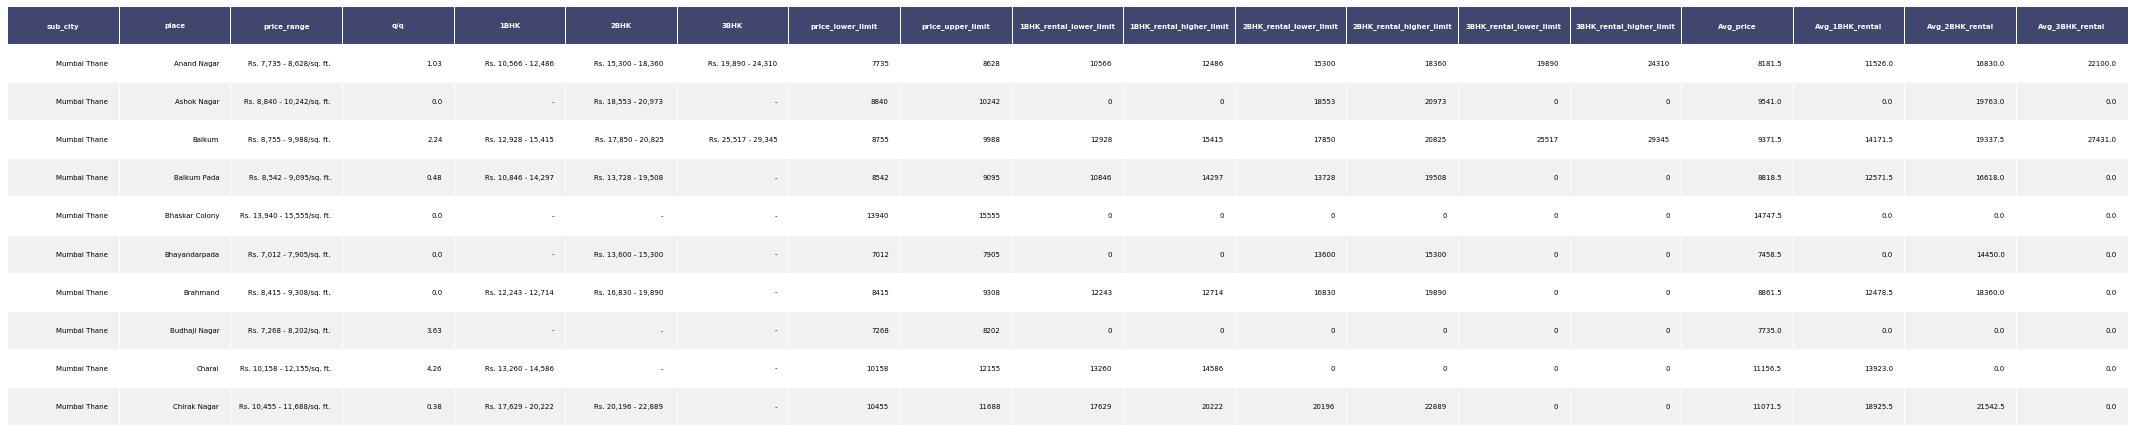

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=7.0, row_height=0.7, font_size=7,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df.head(10), header_columns=0, col_width = 2)

In [8]:
df[df["place"] == "Kopargaon"]

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
127,Mumbai Beyond Thane,Kopargaon,"Rs. 5,398 - 6,460/sq. ft.",0.0,-,-,-,5398,6460,0,0,0,0,0,0,5929.0,0.0,0.0,0.0


In [26]:
df[df["place"] == "Adarsh Nagar"]

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
716,Mumbai South,Adarsh Nagar,"Rs. 32,852 - 39,652/sq. ft.",0.46,"Rs. 23,715 - 26,245","Rs. 61,370 - 74,290","Rs. 1,13,356 - 1,40,278",32852,39652,23715,26245,61370,74290,113356,140278,36252.0,24980.0,67830.0,126817.0


In [25]:
df.loc[df["place"] == "Adarsh Nagar","sub_city"] = "Mumbai South"

In [15]:
df.sub_city.unique()

array(['Mumbai Thane', 'Mumbai Beyond Thane', 'Mira Road And Beyond',
       'Mumbai Andheri-Dahisar', 'Mumbai South West',
       'Central Mumbai suburbs', 'Mumbai Navi', 'Mumbai South',
       'Mumbai Harbour'], dtype=object)

In [27]:
#  df.to_csv("housing_price_mumbai_ready.csv")

### T

In [2]:
df = pd.read_csv("housing_price_mumbai_ready.csv")

In [3]:
df.head()

,Unnamed: 0,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310,8181.5,11526.0,16830.0,22100.0
1,1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0,9541.0,0.0,19763.0,0.0
2,2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345,9371.5,14171.5,19337.5,27431.0
3,3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0,8818.5,12571.5,16618.0,0.0
4,4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0,14747.5,0.0,0.0,0.0


In [9]:
df.place.value_counts(ascending = False).head(15)

Hanuman Nagar        3
Shanti Nagar         2
Maharashtra Nagar    2
Gandhi Nagar         2
Vaishali Nagar       2
Sai Nagar            2
Subhash Nagar        2
Asha Nagar           2
Ganesh Nagar         2
Shastri Nagar        2
Motilal Nagar II     1
Gorai                1
Nilemore             1
P And T Colony       1
Shirgaon             1
Name: place, dtype: int64

In [4]:
df[df["place"] == "Hanuman Nagar"]

,Unnamed: 0,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
107,107,Mumbai Beyond Thane,Hanuman Nagar,"Rs. 4,080 - 4,845/sq. ft.",0.00,-,-,-,4080,4845,0,0,0,0,0,0,4462.5,0.0,0.0,0.0
289,289,Mumbai Andheri-Dahisar,Hanuman Nagar,"Rs. 12,368 - 14,748/sq. ft.",0.00,-,-,-,12368,14748,0,0,0,0,0,0,13558.0,0.0,0.0,0.0
732,732,Mumbai South,Hanuman Nagar,"Rs. 24,735 - 29,495/sq. ft.",2.41,"Rs. 23,715 - 27,540",-,"Rs. 1,85,912 - 2,37,038",24735,29495,23715,27540,0,0,185912,237038,27115.0,25627.5,0.0,211475.0
